# sklearn workflow

## Getting the data ready

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

3 main things to do:


    1. Split data into features and labels (`X` and `y`)
    2. Filling (imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (encoding)

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [4]:
# split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## make sure it's all numerical

In [5]:
cs_extended = pd.read_csv("car-sales-extended.csv")
cs_extended

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [6]:
cs_extended.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [7]:
X = cs_extended.drop("Price", axis=1)
y = cs_extended["Price"]

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np 

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
rfr.score(X_test, y_test)

0.2416957787072912

## mising values

In [11]:
cs_missing = pd.read_csv("car-sales-extended-missing-data.csv")

cs_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [12]:
cs_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
X = cs_missing.drop("Price", axis=1)
y = cs_missing["Price"]

In [14]:
## option 1: filling missing data 

cs_missing["Make"].fillna("missing", inplace=True)
cs_missing["Colour"].fillna("missing", inplace=True)
cs_missing["Odometer (KM)"].fillna(cs_missing["Odometer (KM)"].mean(), inplace=True)
cs_missing["Doors"].fillna(4, inplace=True)

In [15]:
## remove rows with missing data 

cs_missing.dropna(inplace=True)

In [16]:
cs_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [17]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

filling missing values using sklearn

In [18]:
cs_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [19]:
cs_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
cs_missing.dropna(subset=["Price"], inplace=True)
cs_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [21]:
X = cs_missing.drop("Price", axis=1)
y = cs_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [23]:
# Get our transformed data array's back into DataFrame's
cs_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

cs_filled_train 

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0
...,...,...,...,...
755,Toyota,missing,4.0,218803.0
756,BMW,Blue,5.0,245427.0
757,Toyota,White,4.0,196225.0
758,Honda,Blue,4.0,133117.0


Choosing the right estimator

In [24]:
# Get California housing dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [25]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(housing['DESCR'])

('.. _california_housing_dataset:\n'
 '\n'
 'California Housing dataset\n'
 '--------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 20640\n'
 '\n'
 '    :Number of Attributes: 8 numeric, predictive attributes and the target\n'
 '\n'
 '    :Attribute Information:\n'
 '        - MedInc        median income in block group\n'
 '        - HouseAge      median house age in block group\n'
 '        - AveRooms      average number of rooms per household\n'
 '        - AveBedrms     average number of bedrooms per household\n'
 '        - Population    block group population\n'
 '        - AveOccup      average number of household members\n'
 '        - Latitude      block group latitude\n'
 '        - Longitude     block group longitude\n'
 '\n'
 '    :Missing Attribute Values: None\n'
 '\n'
 'This dataset was obtained from the StatLib repository.\n'
 'https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n'
 '\n'
 'The target variable is 

In [26]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [27]:
X = housing_df
y = housing["target"]

In [28]:
from sklearn.linear_model import Ridge



np.random.seed(1324)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


regr = Ridge()
regr.fit(X_train, y_train)

regr.score(X_test, y_test)

0.6255039759972552

In [29]:
from sklearn.linear_model import ElasticNet

regr2 = ElasticNet()
regr2.fit(X_train, y_train)
regr2.score(X_test, y_test)

0.43690829408666454

In [30]:
from sklearn.ensemble import RandomForestRegressor

regr3 = RandomForestRegressor()
regr3.fit(X_train, y_train)
regr3.score(X_test, y_test)

0.8168305974427392

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [33]:
iris_df = pd.DataFrame(iris["data"])
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
X = iris_df
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [35]:
from sklearn.ensemble import RandomForestClassifier

cfr = RandomForestClassifier()
cfr.fit(X_train, y_train)
cfr.score(X_test, y_test)

0.9666666666666667

In [36]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
from sklearn.svm import LinearSVC

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=10000)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\AbdusAli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\AbdusAli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5901639344262295

In [38]:
cfr2= RandomForestClassifier()
cfr2.fit(X_train, y_train)
cfr2.score(X_test, y_test)

0.8360655737704918

In [39]:
y_pred = cfr2.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [40]:
np.mean(y_pred == y_test), cfr2.score(X_test, y_test)

(0.8360655737704918, 0.8360655737704918)

In [41]:
# make predictions with predict_proba, which returns the probability of a label

cfr2.predict_proba(X_test)

array([[0.94, 0.06],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.03, 0.97],
       [0.58, 0.42],
       [0.37, 0.63],
       [0.12, 0.88],
       [0.81, 0.19],
       [0.04, 0.96],
       [0.59, 0.41],
       [0.12, 0.88],
       [0.24, 0.76],
       [0.23, 0.77],
       [0.62, 0.38],
       [0.45, 0.55],
       [0.47, 0.53],
       [0.97, 0.03],
       [0.18, 0.82],
       [0.35, 0.65],
       [0.42, 0.58],
       [0.17, 0.83],
       [0.69, 0.31],
       [0.97, 0.03],
       [0.07, 0.93],
       [0.3 , 0.7 ],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.44, 0.56],
       [0.68, 0.32],
       [0.21, 0.79],
       [0.08, 0.92],
       [0.81, 0.19],
       [0.61, 0.39],
       [0.88, 0.12],
       [0.3 , 0.7 ],
       [0.06, 0.94],
       [0.82, 0.18],
       [0.23, 0.77],
       [0.95, 0.05],
       [0.45, 0.55],
       [0.56, 0.44],
       [0.03, 0.97],
       [0.09, 0.91],
       [0.36, 0.64],
       [0.61, 0.39],
       [0.61,

In [42]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [43]:
X = housing_df
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr2 = RandomForestRegressor()
rfr2.fit(X_train, y_train)


RandomForestRegressor()

In [44]:
y_pred = rfr2.predict(X_test)
y_pred

array([2.10516, 2.22627, 5.00001, ..., 1.95792, 2.06965, 3.24455])

In [45]:
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(y_pred, y_test)

0.32943981838662806

In [46]:
r2_score(y_pred, y_test)

0.7672108504855372

Evaluating an ML model

In [47]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cfr4= RandomForestClassifier()
cfr4.fit(X_train, y_train)
cfr4.score(X_test, y_test)

0.7540983606557377

classification model evaluation metrics

In [48]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(cfr4, X, y)
cv_score

array([0.83606557, 0.8852459 , 0.80327869, 0.85      , 0.8       ])

In [49]:
from sklearn.metrics import roc_curve

y_prob = cfr4.predict_proba(X_test)

y_prob_positive = y_prob[:,1]
y_prob_positive[:5]

array([0.65, 0.8 , 0.03, 0.72, 0.96])

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive) 

fpr

array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.0625 , 0.0625 ,
       0.125  , 0.125  , 0.15625, 0.15625, 0.1875 , 0.21875, 0.21875,
       0.25   , 0.25   , 0.3125 , 0.375  , 0.375  , 0.5    , 0.5625 ,
       0.71875, 0.78125, 0.84375, 0.90625, 1.     ])

In [51]:
tpr

array([0.        , 0.03448276, 0.13793103, 0.13793103, 0.27586207,
       0.27586207, 0.44827586, 0.44827586, 0.55172414, 0.5862069 ,
       0.65517241, 0.68965517, 0.68965517, 0.72413793, 0.75862069,
       0.89655172, 0.89655172, 0.89655172, 0.93103448, 0.93103448,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [52]:
# create function for plotting ROC curve
import matplotlib.pyplot as plt 

def plot_roc_curve(tpr, fpr):
    """
    plots an ROC curve given the true positive rate (tpr)
    and false positive rate (fpr)
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--")

    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()

    

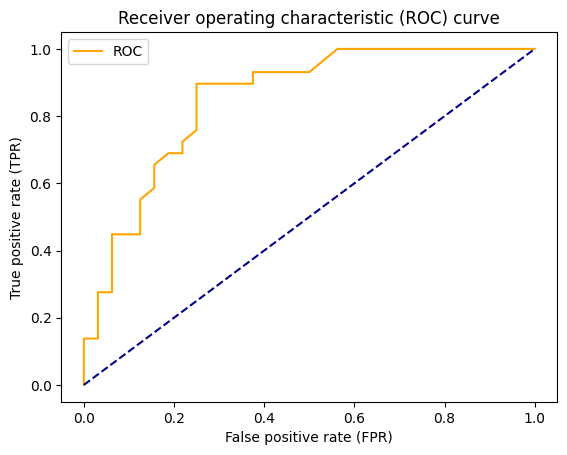

In [53]:
plot_roc_curve(tpr, fpr)

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = cfr4.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[24,  8],
       [ 7, 22]], dtype=int64)

In [55]:
import seaborn as sns

<Axes: >

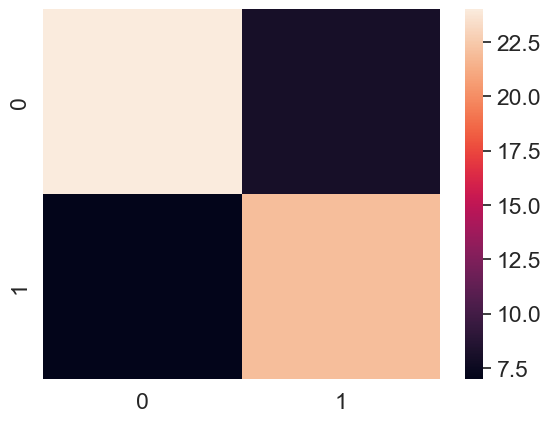

In [56]:
sns.set(font_scale=1.5)

# create confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat)

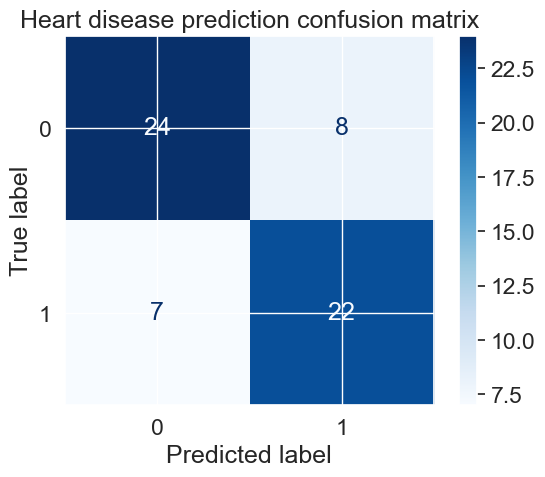

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
                                             y_true=y_test,
                                             y_pred=y_pred,
                                             display_labels=["0", "1"],
                                             cmap=plt.cm.Blues)
disp.ax_.set_title("Heart disease prediction confusion matrix")
plt.show()

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.73      0.76      0.75        29

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [59]:
X = housing_df
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr3 = RandomForestRegressor()
rfr3.fit(X_train, y_train)


RandomForestRegressor()

In [60]:
rfr3.score(X_test, y_test)

0.818994184832438

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = rfr3.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE ", mean_squared_error(y_test, y_pred))


R2 score:  0.818994184832438
MAE:  0.31736647342538776
MSE  0.24436161656537161


Improving a model

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

## Hyperparameter tuning 

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
grid = {"n_estimators": [10, 100, 200, 500],
        "max_depth": [None, 5, 10, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()


In [65]:
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

In [71]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; tot

C:\Users\AbdusAli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AbdusAli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AbdusAli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500]},
                   verbose=2)

In [72]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [79]:
# grid search CV
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators": [10, 100, 200],
        "max_depth": [None],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2],
        "min_samples_leaf": [1, 2]}


clf = RandomForestClassifier()

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5,
                      verbose=2,
                      error_score='raise')

In [80]:
gs_clf.fit(X_train, y_train )

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_est

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

## saving and loading models

In [81]:
import pickle

pickle.dump(gs_clf, open("gs_rand_forest1.pkl", "wb"))

In [82]:
loaded_pickle_model = pickle.load(open("gs_rand_forest1.pkl", "rb"))

In [85]:

loaded_pickle_model.score(X_test, y_test)

0.819672131147541

In [86]:
# using joblib

from joblib import dump, load

dump(gs_clf, filename="gs_rand_forest1.joblib")

['gs_rand_forest1.joblib']

In [87]:
loaded_joblib_model = load("gs_rand_forest1.joblib")
loaded_joblib_model.score(X_test, y_test)

0.819672131147541